In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nifty50-stock-market-data/HDFCBANK.csv
/kaggle/input/nifty50-stock-market-data/GRASIM.csv
/kaggle/input/nifty50-stock-market-data/WIPRO.csv
/kaggle/input/nifty50-stock-market-data/stock_metadata.csv
/kaggle/input/nifty50-stock-market-data/BPCL.csv
/kaggle/input/nifty50-stock-market-data/INFY.csv
/kaggle/input/nifty50-stock-market-data/LT.csv
/kaggle/input/nifty50-stock-market-data/RELIANCE.csv
/kaggle/input/nifty50-stock-market-data/BRITANNIA.csv
/kaggle/input/nifty50-stock-market-data/INFRATEL.csv
/kaggle/input/nifty50-stock-market-data/HEROMOTOCO.csv
/kaggle/input/nifty50-stock-market-data/HINDUNILVR.csv
/kaggle/input/nifty50-stock-market-data/TATAMOTORS.csv
/kaggle/input/nifty50-stock-market-data/MM.csv
/kaggle/input/nifty50-stock-market-data/HDFC.csv
/kaggle/input/nifty50-stock-market-data/JSWSTEEL.csv
/kaggle/input/nifty50-stock-market-data/TITAN.csv
/kaggle/input/nifty50-stock-market-data/HINDALCO.csv
/kaggle/input/nifty50-stock-market-data/AXISBANK.csv
/kaggle/inpu

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv('/kaggle/input/nifty50-stock-market-data/ADANIPORTS.csv')


In [4]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123,0.2741


In [5]:
df.tail()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
3317,2021-04-26,ADANIPORTS,EQ,725.35,733.0,739.65,728.90,729.2,730.75,733.25,9390549,6.885658e+14,116457.0,838079,0.0892
3318,2021-04-27,ADANIPORTS,EQ,730.75,735.0,757.50,727.35,748.6,749.15,747.67,20573107,1.538191e+15,236896.0,1779639,0.0865
3319,2021-04-28,ADANIPORTS,EQ,749.15,755.0,760.00,741.10,743.4,746.25,751.02,11156977,8.379106e+14,130847.0,1342353,0.1203
3320,2021-04-29,ADANIPORTS,EQ,746.25,753.2,765.85,743.40,746.4,746.75,753.06,13851910,1.043139e+15,153293.0,1304895,0.0942
3321,2021-04-30,ADANIPORTS,EQ,746.75,739.0,759.45,724.50,726.4,730.05,743.35,12600934,9.366911e+14,132141.0,3514692,0.2789


In [6]:
df.drop(columns=['Symbol','Series','Turnover'],axis=1,inplace=True)

In [7]:
df.columns

Index(['Date', 'Prev Close', 'Open', 'High', 'Low', 'Last', 'Close', 'VWAP',
       'Volume', 'Trades', 'Deliverable Volume', '%Deliverble'],
      dtype='object')

In [8]:
df['Date']=pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)


In [9]:
df.describe()


,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Trades,Deliverable Volume,%Deliverble
count,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3.322000e+03,2.456000e+03,3.322000e+03,3322.000000
mean,344.114314,344.763019,351.608007,337.531969,344.239539,344.201626,344.853182,2.954564e+06,4.492259e+04,1.207441e+06,0.445899
std,192.936882,193.619992,198.617808,188.676614,193.187813,193.045886,193.841305,4.104227e+06,5.023124e+04,1.398640e+06,0.160496
min,108.000000,108.000000,110.450000,105.650000,108.000000,108.000000,108.340000,1.236600e+04,3.660000e+02,5.383000e+03,0.067000
25%,164.312500,164.850000,168.000000,161.600000,164.075000,164.312500,164.855000,7.493682e+05,2.083200e+04,3.212005e+05,0.332900
50%,324.700000,325.750000,331.275000,319.850000,325.000000,324.700000,325.765000,2.007292e+06,3.588150e+04,8.132775e+05,0.445650
75%,400.912500,401.000000,407.187500,395.000000,400.912500,400.912500,400.607500,3.636883e+06,5.336875e+04,1.605528e+06,0.555850
max,1307.450000,1310.250000,1324.000000,1270.000000,1308.000000,1307.450000,1302.150000,9.771788e+07,1.205984e+06,2.241652e+07,0.979800


# Visualize

<Axes: xlabel='Date'>

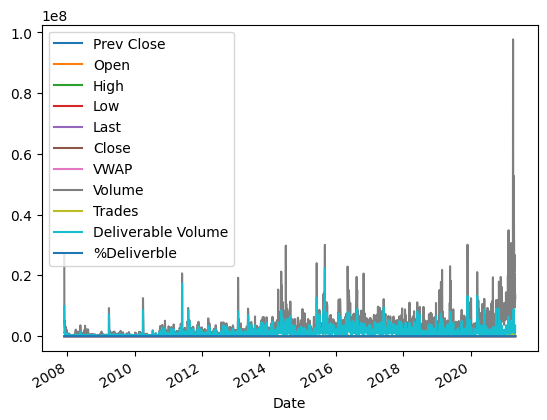

In [10]:
from statsmodels.tsa.stattools import adfuller
df.plot()

In [11]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt


In [12]:
df['Prediction'] = np.where(df['Close'] > df['Open'], 1, 0)


In [13]:
train_size = int(len(df) * 0.8)
train_data = df[:train_size]
test_data = df[train_size:]

In [14]:
train_data

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Trades,Deliverable Volume,%Deliverble,Prediction
Date,,,,,,,,,,,,
2007-11-27,440.00,770.00,1050.00,770.00,959.00,962.90,984.72,27294366,NaN,9859619,0.3612,1
2007-11-28,962.90,984.00,990.00,874.00,885.00,893.90,941.38,4581338,NaN,1453278,0.3172,0
2007-11-29,893.90,909.00,914.75,841.00,887.00,884.20,888.09,5124121,NaN,1069678,0.2088,0
2007-11-30,884.20,890.00,958.00,890.00,929.00,921.55,929.17,4609762,NaN,1260913,0.2735,1
2007-12-03,921.55,939.75,995.00,922.00,980.00,969.30,965.65,2977470,NaN,816123,0.2741,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-10,378.00,377.30,382.10,376.00,378.55,379.30,379.05,1142258,15991.0,251976,0.2206,1
2018-08-13,379.30,378.00,379.60,374.65,377.55,377.15,377.11,1438549,36205.0,510193,0.3547,0
2018-08-14,377.15,377.55,378.70,371.00,372.35,373.15,373.90,1501909,43119.0,440128,0.2930,0


In [15]:
arima_order = (5, 1, 0)  # Example order, you may adjust this
arima_model = ARIMA(train_data['Prediction'], order=arima_order)
arima_model_fit = arima_model.fit()
arima_forecast = arima_model_fit.forecast(steps=len(test_data))

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/conda/lib/p

In [16]:
df.columns

Index(['Prev Close', 'Open', 'High', 'Low', 'Last', 'Close', 'VWAP', 'Volume',
       'Trades', 'Deliverable Volume', '%Deliverble', 'Prediction'],
      dtype='object')

In [17]:
cols=['Prev Close', 'Open', 'High', 'Low', 'Last', 'Close', 'VWAP', 'Volume',
       'Trades', 'Deliverable Volume', '%Deliverble']
train_features = train_data[cols]
train_target = train_data['Prediction']
test_features = test_data[cols]
test_target = test_data['Prediction']

In [18]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [19]:
df.fillna(df.mean(),inplace=True)

In [20]:
# Create and fit ARIMA model
arima_order = (5, 1, 0)  # Example order, you may adjust this
arima_model = ARIMA(train_data['Prediction'], order=arima_order)
arima_model_fit = arima_model.fit()

# Forecast using ARIMA model
arima_forecast = arima_model_fit.forecast(steps=len(test_data))


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/conda/lib/p

In [21]:
# Create and fit SARIMA model
sarima_order = (1, 1, 1)  # Example order, you may adjust this
sarima_seasonal_order = (1, 1, 1, 12)  # Example seasonal order, you may adjust this
sarima_model = SARIMAX(train_data['Prediction'], order=sarima_order, seasonal_order=sarima_seasonal_order)
sarima_model_fit = sarima_model.fit()

# Forecast using SARIMA model
sarima_forecast = sarima_model_fit.forecast(steps=len(test_data))


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.76974D-01    |proj g|=  4.84616D-01

At iterate    5    f=  8.53373D-01    |proj g|=  1.16853D-01

At iterate   10    f=  7.48391D-01    |proj g|=  3.20705D-02

At iterate   15    f=  7.36563D-01    |proj g|=  1.33987D-02

At iterate   20    f=  7.34272D-01    |proj g|=  2.36377D-03

At iterate   25    f=  7.34148D-01    |proj g|=  1.33319D-03

At iterate   30    f=  7.34141D-01    |proj g|=  1.22002D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


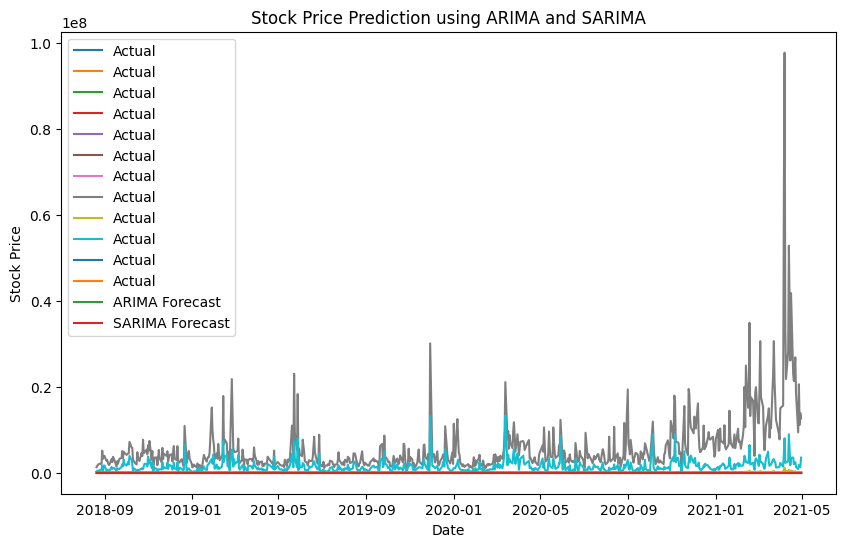

In [22]:
# Plotting results
plt.figure(figsize=(10, 6))
plt.plot(df.index[train_size:], test_data, label='Actual')
plt.plot(df.index[train_size:], arima_forecast, label='ARIMA Forecast')
plt.plot(df.index[train_size:], sarima_forecast, label='SARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.title('Stock Price Prediction using ARIMA and SARIMA')
plt.show()


In [23]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(train_features, train_target)
rf_predictions = rf_regressor.predict(test_features)

# Calculate accuracy score and RMSE
accuracy = accuracy_score(test_target, rf_predictions.round())
mse_rf = mean_squared_error(test_target, rf_predictions, squared=False)

# Print accuracy score and RMSE
print(f'Accuracy: {accuracy:.2f}')
print(f'RMSE (Random Forest): {mse_rf:.2f}')

# Plotting results
plt.figure(figsize=(10, 6))
plt.plot(df.index[train_size:],test_target , label='Actual')
plt.plot(df.index[train_size:], rf_predictions, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.title('Stock Market Futures Prediction')
plt.show()

ValueError: Input X contains NaN.
RandomForestRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import accuracy_score, mean_squared_error
from math import sqrt
from sklearn.model_selection import train_test_split

# Load your dataset
data = pd.read_csv('/kaggle/input/nifty50-stock-market-data/ADANIPORTS.csv')

# Calculate the difference between Close and Open
data['Diff'] = data['Close'] - data['Open']

# Split the data into features (X) and target variable (y)
X = data[['Prev Close', 'Open', 'High', 'Low', 'Last', 'Close', 'VWAP', 'Volume', 'Trades', 'Deliverable Volume', '%Deliverble']]
y = data['Diff']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit ARIMA model
model = ARIMA(y_train, order=(5,1,0))  # Example order, you can tune this
model_fit = model.fit()

# Make predictions
y_pred = model_fit.forecast(steps=len(X_test))

# Convert predictions to 1 or 0 based on the condition
y_pred


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Load your dataset
data = pd.read_csv('/kaggle/input/nifty50-stock-market-data/ADANIPORTS.csv')

# Calculate the difference between Close and Open
data['Diff'] = data['Close'] - data['Open']

# Drop rows with missing values in any column
data.dropna(inplace=True)

# Define features (X) and target variable (y)
X = data[['Prev Close', 'Open', 'High', 'Low', 'Last', 'Close', 'VWAP', 'Volume', 'Trades', 'Deliverable Volume', '%Deliverble']]
y = [1 if diff > 0 else 0 for diff in data['Diff']]  # Create binary labels based on 'Diff'

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle missing values with SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Initialize and train Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust hyperparameters
rf_classifier.fit(X_train_imputed, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test_imputed)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate RMSE (since we're predicting binary labels, RMSE isn't typically used for classification, but we can calculate it for comparison)
rmse = sqrt(mean_squared_error(y_test, y_pred))

print(f'Accuracy: {accuracy}')
print(f'RMSE: {rmse}')


In [ ]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, mean_squared_error
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Load your dataset
data = pd.read_csv('/kaggle/input/nifty50-stock-market-data/ADANIPORTS.csv')

# Calculate the difference between Close and Open
data['Diff'] = data['Close'] - data['Open']

# Drop rows with missing values in any column
data.dropna(inplace=True)

# Define features (X) and target variable (y)
X = data[['Prev Close', 'Open', 'High', 'Low', 'Last', 'Close', 'VWAP', 'Volume', 'Trades', 'Deliverable Volume', '%Deliverble']]
y = [1 if diff > 0 else 0 for diff in data['Diff']]  # Create binary labels based on 'Diff'

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle missing values with SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Initialize and train XGBoost Classifier
xgb_classifier = XGBClassifier(random_state=42)  # You can adjust hyperparameters
xgb_classifier.fit(X_train_imputed, y_train)

# Make predictions
y_pred = xgb_classifier.predict(X_test_imputed)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate RMSE (since we're predicting binary labels, RMSE isn't typically used for classification, but we can calculate it for comparison)
rmse = sqrt(mean_squared_error(y_test, y_pred))

print(f'Accuracy: {accuracy}')
print(f'RMSE: {rmse}')


In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Load your dataset
data = pd.read_csv('/kaggle/input/nifty50-stock-market-data/ADANIPORTS.csv')

# Calculate the difference between Close and Open
data['Diff'] = data['Close'] - data['Open']

# Drop rows with missing values in any column
data.dropna(inplace=True)

# Define features (X) and target variable (y)
X = data[['Prev Close', 'Open', 'High', 'Low', 'Last', 'Close', 'VWAP', 'Volume', 'Trades', 'Deliverable Volume', '%Deliverble']]
y = [1 if diff > 0 else 0 for diff in data['Diff']]  # Create binary labels based on 'Diff'

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle missing values with SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Initialize and train Logistic Regression Classifier
logreg_classifier = LogisticRegression(random_state=42)  # You can adjust hyperparameters
logreg_classifier.fit(X_train_imputed, y_train)

# Make predictions
y_pred = logreg_classifier.predict(X_test_imputed)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate RMSE (since we're predicting binary labels, RMSE isn't typically used for classification, but we can calculate it for comparison)
rmse = sqrt(mean_squared_error(y_test, y_pred))

print(f'Accuracy: {accuracy}')
print(f'RMSE: {rmse}')


In [ ]:
import pandas as pd
from arch import arch_model
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Load your dataset
data = pd.read_csv('your_dataset.csv')

# Calculate the difference between Close and Open
data['Diff'] = data['Close'] - data['Open']

# Drop rows with missing values in any column
data.dropna(inplace=True)

# Define the target variable (volatility, which is the square root of variance)
y = data['Diff']

# Train-test split
y_train, y_test = train_test_split(y, test_size=0.2, random_state=42)

# Initialize and fit GARCH(1,1) model
garch_model = arch_model(y_train, vol='GARCH', p=1, q=1)
garch_result = garch_model.fit()

# Make predictions for the test set
y_pred, _ = garch_result.forecast(start=len(y_train), horizon=len(y_test))

# Calculate RMSE
rmse = sqrt(mean_squared_error(y_test, y_pred))

print(f'GARCH(1,1) RMSE: {rmse}')


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Load your dataset
data = pd.read_csv('your_dataset.csv')

# Calculate the difference between Close and Open
data['Diff'] = data['Close'] - data['Open']

# Drop rows with missing values in any column
data.dropna(inplace=True)

# Define features (X) and target variable (y)
X = data[['Prev Close', 'Open', 'High', 'Low', 'Last', 'Close', 'VWAP', 'Volume', 'Trades', 'Deliverable Volume', '%Deliverble']]
y = [1 if diff > 0 else 0 for diff in data['Diff']]  # Create binary labels based on 'Diff'

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle missing values with SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Normalize the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Reshape the data for LSTM input (samples, time steps, features)
n_steps = 1
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], n_steps, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], n_steps, X_test_scaled.shape[1]))

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, X_train_scaled.shape[1])))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, verbose=1)

# Evaluate the model
y_pred = model.predict_classes(X_test_reshaped)
accuracy = accuracy_score(y_test, y_pred)

print(f'LSTM Accuracy: {accuracy}')


In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Load your dataset
data = pd.read_csv('your_dataset.csv')

# Calculate the difference between Close and Open
data['Diff'] = data['Close'] - data['Open']

# Drop rows with missing values in any column
data.dropna(inplace=True)

# Define the target variable (y)
y = [1 if diff > 0 else 0 for diff in data['Diff']]  # Create binary labels based on 'Diff'

# Train-test split
y_train, y_test = train_test_split(y, test_size=0.2, random_state=42)

# Initialize and fit SARIMA model
sarima_model = SARIMAX(y_train, order=(1, 0, 1), seasonal_order=(1, 0, 1, 12))
sarima_result = sarima_model.fit()

# Make predictions for the test set
y_pred = sarima_result.forecast(steps=len(y_test))

# Convert predictions to binary labels (1 if forecasted value > 0, else 0)
y_pred_binary = [1 if pred > 0 else 0 for pred in y_pred]

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_binary)

print(f'SARIMA Accuracy: {accuracy}')


In [ ]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, mean_squared_error
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Load your dataset
data = pd.read_csv('/kaggle/input/nifty50-stock-market-data/ADANIPORTS.csv')

# Calculate the difference between Close and Open
data['Diff'] = data['Close'] - data['Open']

# Drop rows with missing values in any column
data.dropna(inplace=True)

# Define features (X) and target variable (y)
X = data[['Prev Close', 'Open', 'High', 'Low', 'Last', 'Close', 'VWAP', 'Volume', 'Trades', 'Deliverable Volume', '%Deliverble']]
y = [1 if diff > 0 else 0 for diff in data['Diff']]  # Create binary labels based on 'Diff'

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle missing values with SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Initialize and train Linear SVM Classifier
svm_classifier = SVC(kernel='linear', random_state=42)  # Linear kernel for Linear SVM
svm_classifier.fit(X_train_imputed, y_train)

# Make predictions
y_pred = svm_classifier.predict(X_test_imputed)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate RMSE (since we're predicting binary labels, RMSE isn't typically used for classification, but we can calculate it for comparison)
rmse = sqrt(mean_squared_error(y_test, y_pred))

print(f'Linear SVM Accuracy: {accuracy}')
print(f'Linear SVM RMSE: {rmse}')
